In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential



In [2]:
mean_data = pd.read_csv(r'C:\Users\Shrinidhi\Desktop\Thesis\fpkm_top_3000_mean_genes.tsv', sep='\t', index_col=0)

# Create the model
model = Sequential()

X = mean_data.drop(columns=['cancer_status']).values

# Convert 'cancer_status' to binary labels 
y = mean_data['cancer_status'].apply(lambda x: 1 if x == 'cancer' else 0).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [3]:
print(mean_data.shape)  
print("Shape of X_train:", X_train.shape)  
print("Shape of X_test:", X_test.shape)    

print("Unique labels in y_train:", np.unique(y_train))  
print("Class distribution in y_train:", np.bincount(y_train))  #class balance

(19131, 3001)
Shape of X_train: (15304, 3000)
Shape of X_test: (3827, 3000)
Unique labels in y_train: [0 1]
Class distribution in y_train: [7681 7623]


In [4]:
from keras.optimizers import Adam

from keras.callbacks import EarlyStopping
# Build the model
model = Sequential()

# Add layers as per the architecture
model.add(Dense(500, input_dim=3000, activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))

# Output layer for binary classification (cancer vs. normal)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Make predictions and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Epoch 1/100
123/123 [==============================] - 4s 20ms/step - loss: 1.3697 - accuracy: 0.4961 - val_loss: 0.7348 - val_accuracy: 0.5351
Epoch 2/100
123/123 [==============================] - 2s 20ms/step - loss: 0.7236 - accuracy: 0.5083 - val_loss: 0.6901 - val_accuracy: 0.4992
Epoch 3/100
123/123 [==============================] - 2s 17ms/step - loss: 0.6143 - accuracy: 0.6704 - val_loss: 0.3837 - val_accuracy: 0.9239
Epoch 4/100
123/123 [==============================] - 2s 18ms/step - loss: 0.6334 - accuracy: 0.6904 - val_loss: 0.3191 - val_accuracy: 0.9366
Epoch 5/100
123/123 [==============================] - 2s 17ms/step - loss: 0.6002 - accuracy: 0.7032 - val_loss: 0.3653 - val_accuracy: 0.9278
Epoch 6/100
123/123 [==============================] - 2s 17ms/step - loss: 0.5751 - accuracy: 0.7136 - val_loss: 0.3326 - val_accuracy: 0.9219
Epoch 7/100
123/123 [==============================] - 2s 19ms/step - loss: 0.7399 - accuracy: 0.6947 - val_loss: 0.2945 - val_accuracy:

In [5]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

y_pred = (model.predict(X_test) > 0.5).astype("int32") 

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

120/120 [==============================] - 0s 3ms/step - loss: 0.2525 - accuracy: 0.9459
Test Accuracy: 0.945910632610321
120/120 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1921
           1       0.91      0.99      0.95      1906

    accuracy                           0.95      3827
   macro avg       0.95      0.95      0.95      3827
weighted avg       0.95      0.95      0.95      3827

[[1733  188]
 [  19 1887]]


In [6]:
# Training accuracy
train_accuracy = history.history['accuracy'][-1]  # Accuracy at the last epoch
print(f"Final Training Accuracy: {train_accuracy}")

Final Training Accuracy: 0.7445070743560791


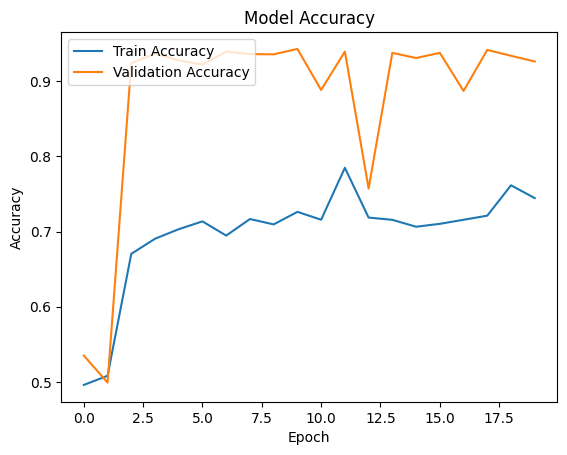

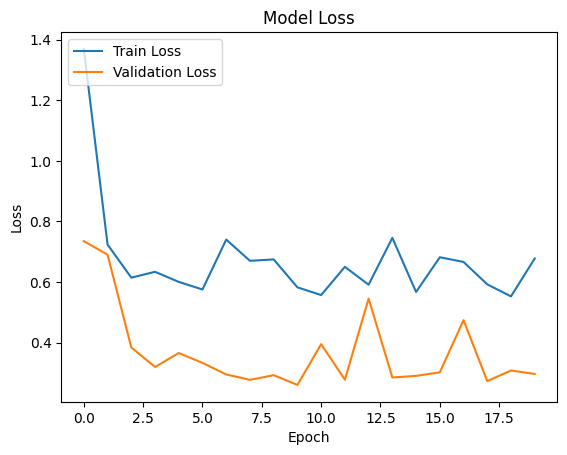

In [7]:
import matplotlib.pyplot as plt

# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94      1921
           1       0.91      0.99      0.95      1906

    accuracy                           0.95      3827
   macro avg       0.95      0.95      0.95      3827
weighted avg       0.95      0.95      0.95      3827



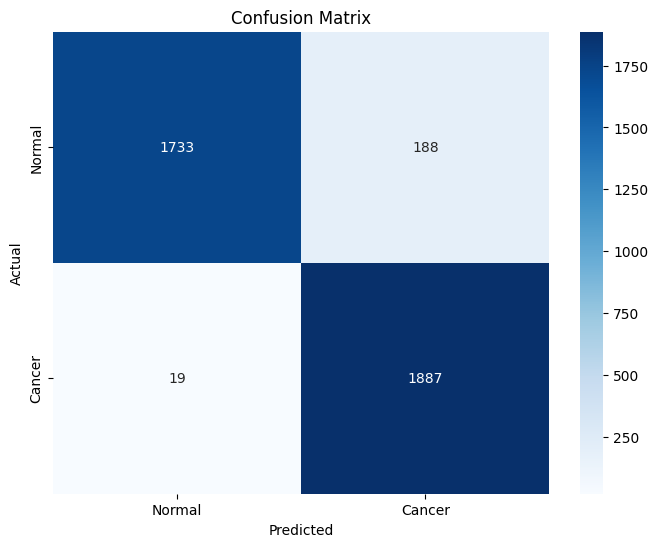

120/120 [==============================] - 0s 2ms/step


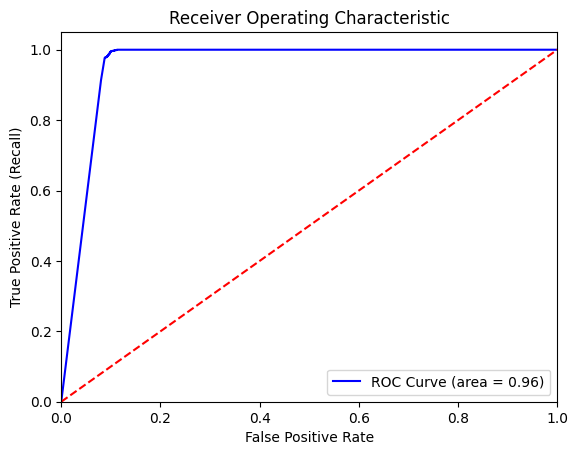

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test are the true labels and y_pred are the predicted labels

# 1. Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Cancer'], yticklabels=['Normal', 'Cancer'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# 3. ROC Curve
y_pred_proba = model.predict(X_test).ravel()  
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


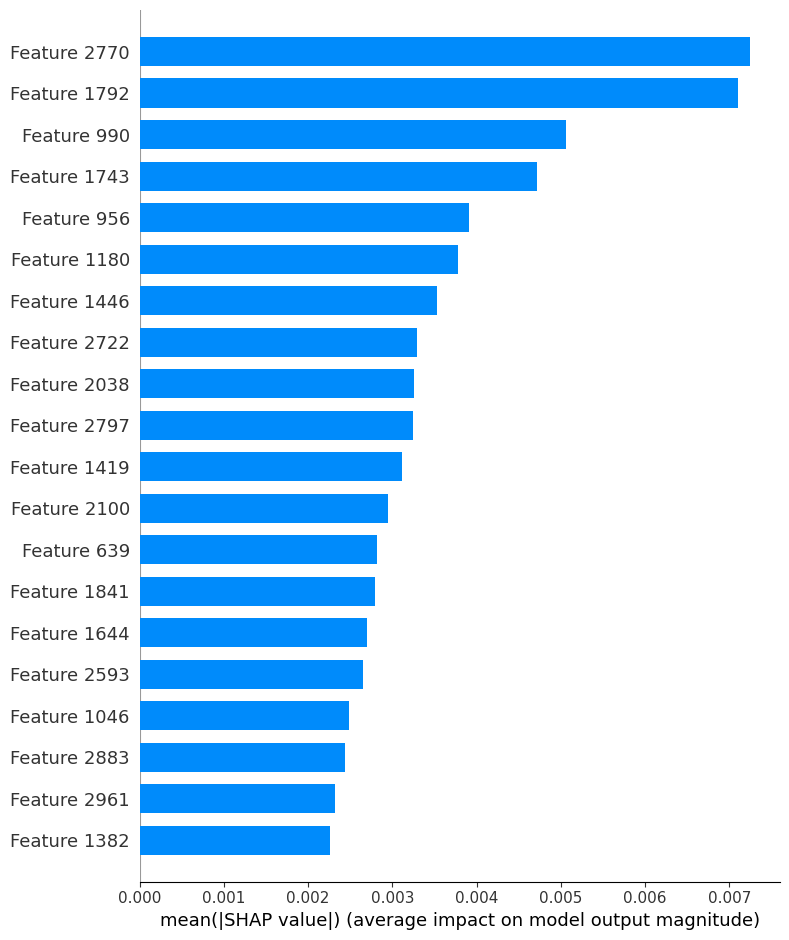

In [9]:
import numpy as np
import shap

batch_size = 500
num_samples = X_test.shape[0]
all_shap_values = []

for start in range(0, num_samples, batch_size):
    end = min(start + batch_size, num_samples)
    X_batch = X_test[start:end]
    
    # Initialize SHAP 
    explainer = shap.DeepExplainer(model, X_batch)
    shap_values_batch = explainer.shap_values(X_batch)
    
    if isinstance(shap_values_batch, list):
        shap_values_batch = shap_values_batch[0]  

    all_shap_values.append(shap_values_batch)

shap_values_full = np.concatenate(all_shap_values, axis=0)

# Plot
shap.summary_plot(shap_values_full, X_test, plot_type="bar")


Top 10 most important genes based on SHAP values:
['ENSG00000118785.13', 'ENSG00000272398.5', 'ENSG00000211896.6', 'ENSG00000189058.8', 'ENSG00000110492.15', 'ENSG00000244734.3', 'ENSG00000168542.12', 'ENSG00000124107.5', 'ENSG00000159189.11', 'ENSG00000143546.9']


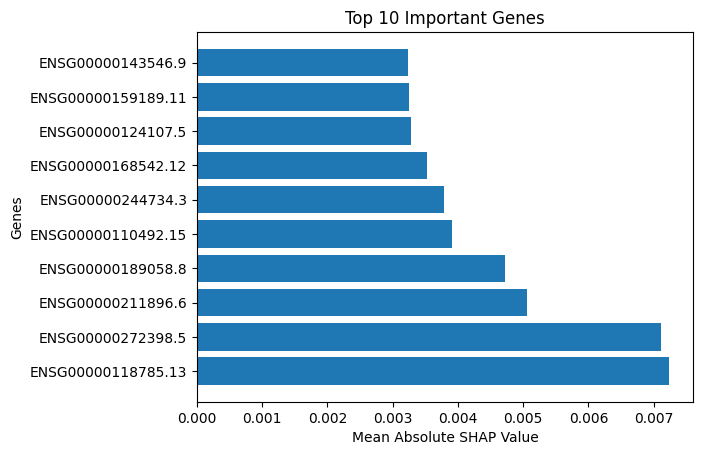

In [10]:
import numpy as np
import shap
import matplotlib.pyplot as plt

feature_names = mean_data.drop(columns=['cancer_status']).columns  #genes

# dict to store shap values and genes
shap_gene_mapping = {}

# Loop through the SHAP values and map them to gene names
for i, feature_name in enumerate(feature_names):
    shap_gene_mapping[feature_name] = shap_values_full[:, i]

# sort genes by their mean absolute SHAP value 
mean_abs_shap = np.abs(shap_values_full).mean(axis=0)
sorted_genes = np.argsort(mean_abs_shap)[::-1]  # sorted by importance
top_10_genes = [feature_names[i] for i in sorted_genes[:10]]
print("Top 10 most important genes based on SHAP values:")
print(top_10_genes)


plt.barh(top_10_genes, mean_abs_shap[sorted_genes[:10]])
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Genes')
plt.title('Top 10 Important Genes')
plt.show()


In [11]:
import pandas as pd
import numpy as np

genes = mean_data.drop(columns=['cancer_status']).columns
shap_importance = np.mean(np.abs(shap_values_full), axis=0)


top_n_genes_indices = np.argsort(shap_importance)[::-1]  
top_n_genes = genes[top_n_genes_indices][:10] 


print("Top 10 genes based on SHAP importance:")
for i, gene in enumerate(top_n_genes):
    print(f"{i+1}. {gene}, SHAP Importance: {shap_importance[top_n_genes_indices[i]]}")

# Cancer status
top_genes_data = mean_data[top_n_genes]

cancer_status = mean_data['cancer_status']

# Concat results
top_genes_with_status = pd.concat([top_genes_data, cancer_status], axis=1)
print("\nTop genes with cancer status:")
print(top_genes_with_status.head())


Top 10 genes based on SHAP importance:
1. ENSG00000118785.13, SHAP Importance: 0.007237848196025551
2. ENSG00000272398.5, SHAP Importance: 0.007104143195790995
3. ENSG00000211896.6, SHAP Importance: 0.005058447975727998
4. ENSG00000189058.8, SHAP Importance: 0.004714772783226091
5. ENSG00000110492.15, SHAP Importance: 0.003913638593999592
6. ENSG00000244734.3, SHAP Importance: 0.0037807966772323894
7. ENSG00000168542.12, SHAP Importance: 0.0035235909596834174
8. ENSG00000124107.5, SHAP Importance: 0.0032875665961587903
9. ENSG00000159189.11, SHAP Importance: 0.0032521106251615084
10. ENSG00000143546.9, SHAP Importance: 0.0032386210179327878

Top genes with cancer status:
                         ENSG00000118785.13  ENSG00000272398.5  \
GTEX-S4Q7-0003-SM-3NM8M             -1.5522             4.0926   
TCGA-19-1787-01                     11.5359             5.9656   
TCGA-S9-A7J2-01                      6.1402             6.0512   
GTEX-QV31-1626-SM-2S1QC              4.0304            -

In [22]:
import pandas as pd
import numpy as np
genes = mean_data.drop(columns=['cancer_status']).columns

#calculate the mean absolute SHAP value
shap_importance = np.mean(np.abs(shap_values_full), axis=0)

#sort
top_n_genes_indices = np.argsort(shap_importance)[::-1]  


top_n_genes = genes[top_n_genes_indices][:100] 


print("Top 10 genes based on SHAP importance:")
for i, gene in enumerate(top_n_genes):
    print(f"{i+1}. {gene}, SHAP Importance: {shap_importance[top_n_genes_indices[i]]}")

#cancer status
top_genes_data = mean_data[top_n_genes]
cancer_status = mean_data['cancer_status']

#concat
top_genes_with_status = pd.concat([top_genes_data, cancer_status], axis=1)
print("\nTop genes with cancer status:")
print(top_genes_with_status.head())

Top 10 genes based on SHAP importance:
1. ENSG00000118785.13, SHAP Importance: 0.007237848196025551
2. ENSG00000272398.5, SHAP Importance: 0.007104143195790995
3. ENSG00000211896.6, SHAP Importance: 0.005058447975727998
4. ENSG00000189058.8, SHAP Importance: 0.004714772783226091
5. ENSG00000110492.15, SHAP Importance: 0.003913638593999592
6. ENSG00000244734.3, SHAP Importance: 0.0037807966772323894
7. ENSG00000168542.12, SHAP Importance: 0.0035235909596834174
8. ENSG00000124107.5, SHAP Importance: 0.0032875665961587903
9. ENSG00000159189.11, SHAP Importance: 0.0032521106251615084
10. ENSG00000143546.9, SHAP Importance: 0.0032386210179327878
11. ENSG00000130208.9, SHAP Importance: 0.003115349580372498
12. ENSG00000206172.8, SHAP Importance: 0.0029487626345397365
13. ENSG00000011465.16, SHAP Importance: 0.0028156987271259403
14. ENSG00000146674.14, SHAP Importance: 0.0027975978896394105
15. ENSG00000173372.16, SHAP Importance: 0.0026992091373816015
16. ENSG00000090382.6, SHAP Importance:

In [ ]:
top_genes_with_status.to_csv("C://Users//Shrinidhi//Desktop//Thesis//Top 100 genes//DNN//top_100_genes_SHAP_mean.csv", index=False)

Top 100 genes saved to 'top_100_genes_deeplift.csv'.


In [12]:
import torch
import torch.nn as nn
import tensorflow as tf
import numpy as np

# Convert Keras model to PyTorch
class PyTorchModel(nn.Module):
    def __init__(self, keras_model):
        super(PyTorchModel, self).__init__()
        self.layers = []
        for layer in keras_model.layers:
            if isinstance(layer, tf.keras.layers.Dense):
                self.layers.append(nn.Linear(layer.input_shape[1], layer.units))
        self.model = nn.Sequential(*self.layers)

    def forward(self, x):
        return self.model(x)


assert "model" in locals(), "Keras model not found. Train your model first."

# Convert model to PyTorch
torch_model = PyTorchModel(model)

# convert to eval mode for it to work??
torch_model.eval()

PyTorchModel(
  (model): Sequential(
    (0): Linear(in_features=3000, out_features=500, bias=True)
    (1): Linear(in_features=500, out_features=500, bias=True)
    (2): Linear(in_features=500, out_features=200, bias=True)
    (3): Linear(in_features=200, out_features=300, bias=True)
    (4): Linear(in_features=300, out_features=200, bias=True)
    (5): Linear(in_features=200, out_features=100, bias=True)
    (6): Linear(in_features=100, out_features=1, bias=True)
  )
)

Input Tensor 0 did not already require gradients, required_grads has been set automatically.
Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished


Top 10 most important genes based on DeepLIFT values:
1: ENSG00000198918.7 (Mean Absolute DeepLIFT: 0.0126)
2: ENSG00000105372.6 (Mean Absolute DeepLIFT: 0.0117)
3: ENSG00000136942.14 (Mean Absolute DeepLIFT: 0.0107)
4: ENSG00000161011.19 (Mean Absolute DeepLIFT: 0.0105)
5: ENSG00000198886.2 (Mean Absolute DeepLIFT: 0.0097)
6: ENSG00000174444.14 (Mean Absolute DeepLIFT: 0.0094)
7: ENSG00000198840.2 (Mean Absolute DeepLIFT: 0.0093)
8: ENSG00000137154.12 (Mean Absolute DeepLIFT: 0.0089)
9: ENSG00000170889.13 (Mean Absolute DeepLIFT: 0.0086)
10: ENSG00000116209.11 (Mean Absolute DeepLIFT: 0.0084)


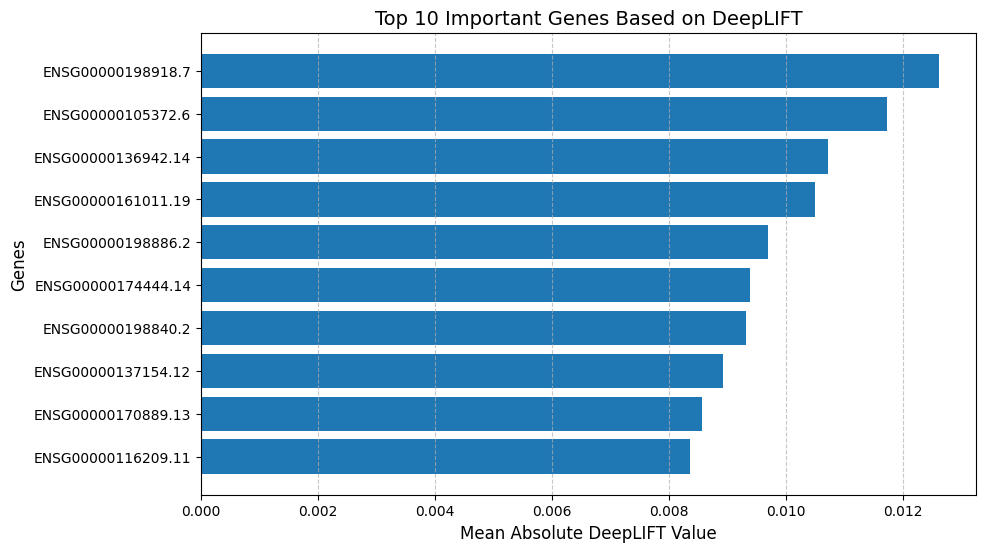

In [13]:
from captum.attr import DeepLift
from captum.attr import visualization as viz

# convert test set to PyTorch tensor
X_test_torch = torch.tensor(X_test, dtype=torch.float32)

# Initialize DeepLIFT
deeplift = DeepLift(torch_model)

# Compute DeepLIFT 
attributions = deeplift.attribute(X_test_torch, baselines=torch.zeros_like(X_test_torch))

# Convert to numpy
attributions_np = attributions.detach().numpy()


feature_names = mean_data.drop(columns=['cancer_status']).columns

# Compute mean absolute DeepLIFT values (similar to shap)
mean_abs_deeplift = np.abs(attributions_np).mean(axis=0)

# Sort genes by importance
sorted_indices = np.argsort(mean_abs_deeplift)[::-1]
top_10_genes = [feature_names[i] for i in sorted_indices[:10]]


print("Top 10 most important genes based on DeepLIFT values:")
for i, gene in enumerate(top_10_genes, 1):
    print(f"{i}: {gene} (Mean Absolute DeepLIFT: {mean_abs_deeplift[sorted_indices[i-1]]:.4f})")
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_10_genes[::-1], mean_abs_deeplift[sorted_indices[:10]][::-1])
plt.xlabel('Mean Absolute DeepLIFT Value', fontsize=12)
plt.ylabel('Genes', fontsize=12)
plt.title('Top 10 Important Genes Based on DeepLIFT', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [20]:
# Extract top 100 genes
top_100_genes = [feature_names[i] for i in sorted_indices[:100]]

print("\nTop 100 Most Important Genes Based on DeepLIFT Values:")
for i, gene in enumerate(top_100_genes, 1):
    print(f"{i}: {gene} (Mean Absolute DeepLIFT: {mean_abs_deeplift[sorted_indices[i-1]]:.4f})")

# Optional: Save to a file
top_100_df = pd.DataFrame({
    "Gene": top_100_genes,
    "Mean Absolute DeepLIFT": mean_abs_deeplift[sorted_indices[:100]]
})


Top 100 Most Important Genes Based on DeepLIFT Values:
1: ENSG00000198918.7 (Mean Absolute DeepLIFT: 0.0126)
2: ENSG00000105372.6 (Mean Absolute DeepLIFT: 0.0117)
3: ENSG00000136942.14 (Mean Absolute DeepLIFT: 0.0107)
4: ENSG00000161011.19 (Mean Absolute DeepLIFT: 0.0105)
5: ENSG00000198886.2 (Mean Absolute DeepLIFT: 0.0097)
6: ENSG00000174444.14 (Mean Absolute DeepLIFT: 0.0094)
7: ENSG00000198840.2 (Mean Absolute DeepLIFT: 0.0093)
8: ENSG00000137154.12 (Mean Absolute DeepLIFT: 0.0089)
9: ENSG00000170889.13 (Mean Absolute DeepLIFT: 0.0086)
10: ENSG00000116209.11 (Mean Absolute DeepLIFT: 0.0084)
11: ENSG00000167526.13 (Mean Absolute DeepLIFT: 0.0083)
12: ENSG00000147604.13 (Mean Absolute DeepLIFT: 0.0082)
13: ENSG00000174021.10 (Mean Absolute DeepLIFT: 0.0081)
14: ENSG00000228253.1 (Mean Absolute DeepLIFT: 0.0079)
15: ENSG00000131100.12 (Mean Absolute DeepLIFT: 0.0078)
16: ENSG00000198695.2 (Mean Absolute DeepLIFT: 0.0077)
17: ENSG00000109475.16 (Mean Absolute DeepLIFT: 0.0077)
18: ENS

In [24]:
top_100_df.to_csv("C://Users//Shrinidhi//Desktop//Thesis//Top 100 genes//DNN//top_100_genes_deeplift_mean.csv", index=False)


In [14]:
import numpy as np
import lime
import lime.lime_tabular
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
feature_names = mean_data.drop(columns=['cancer_status']).columns.tolist()

# Initialize LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,  
    feature_names=feature_names,
    class_names=["Normal", "Cancer"],  # Labels for binary classification
    mode="classification"
)


In [16]:
def predict_fn(X):
    preds = model.predict(X)  # (N, 1)
    return np.hstack([1 - preds, preds])  # [P(Normal), P(Cancer)]

157/157 [==============================] - 1s 4ms/step


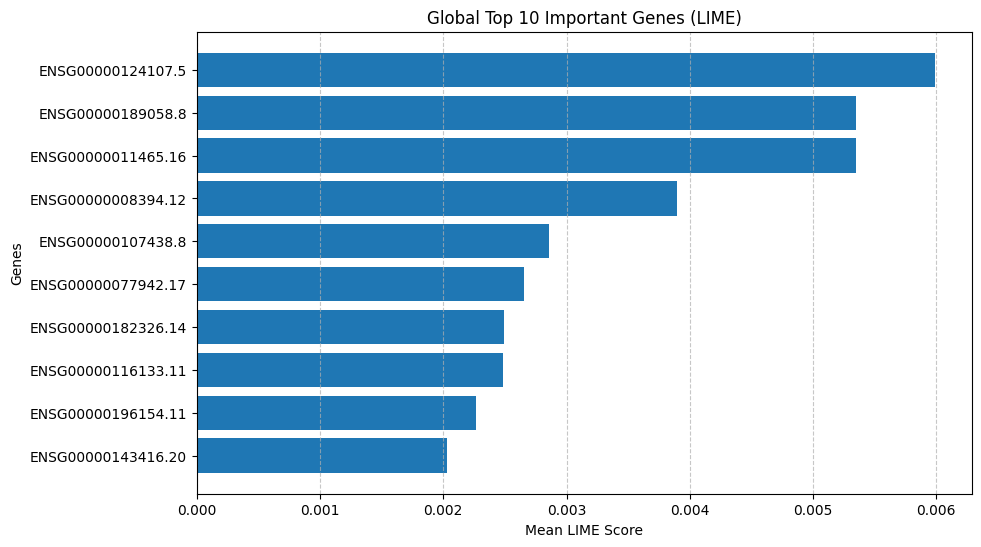

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dict to store all genes
lime_scores = {gene: [] for gene in mean_data}

num_samples = len(X_test)  

for idx in range(num_samples):  
    sample = X_test[idx].reshape(1, -1)  # Sample
    explanation = explainer.explain_instance(sample.flatten(), predict_fn, num_features=len(feature_names))  # Consider all genes
    
    # Store values
    for feature, score in explanation.as_list():
        gene = feature.split()[0]  # Extract gene name 
        if gene in lime_scores: 
            lime_scores[gene].append(score)

# Mean importance across all samples
lime_avg_scores = {gene: np.mean(scores) for gene, scores in lime_scores.items() if scores}  


lime_df = pd.DataFrame(list(lime_avg_scores.items()), columns=["Gene", "Mean LIME Score"])
lime_df = lime_df.sort_values(by="Mean LIME Score", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(lime_df["Gene"].iloc[:10][::-1], lime_df["Mean LIME Score"].iloc[:10][::-1])  # Top 10 features
plt.xlabel("Mean LIME Score")
plt.ylabel("Genes")
plt.title("Global Top 10 Important Genes (LIME)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [18]:
# Print top 100 most important genes
top_100_genes = lime_df.head(100)
print("\nTop 100 Most Important Genes Based on LIME:")
print(top_100_genes)


Top 100 Most Important Genes Based on LIME:
                    Gene  Mean LIME Score
2722   ENSG00000124107.5         0.005988
1743   ENSG00000189058.8         0.005350
639   ENSG00000011465.16         0.005349
968   ENSG00000008394.12         0.003899
809    ENSG00000107438.8         0.002860
...                  ...              ...
1034  ENSG00000162909.17         0.000832
1624  ENSG00000176014.12         0.000829
2069  ENSG00000129187.14         0.000826
936   ENSG00000165795.20         0.000822
2910  ENSG00000176444.18         0.000821

[100 rows x 2 columns]


In [ ]:
top_100_genes.to_csv("C://Users//Shrinidhi//Desktop//Thesis//Top 100 genes//DNN//top_100_genes_lime_mean.csv", index=False)

Top 100 genes saved to 'top_100_genes_lime.csv'.
